In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('data/df_with_pca.csv')

## Variabile dummy per Macroarea

In [4]:
df = pd.get_dummies(df, columns=["Macroarea"], drop_first=True)

## Variabile dummy per Descrizione Tipologia di Immobile e Renaming delle colonne per eliminare gli spazi

In [5]:
df = pd.get_dummies(df, columns=["Descrizione Tipologia di Immobile"], drop_first=True)

In [6]:
df.rename(columns={"Descrizione Tipologia di Immobile_Abitazioni di tipo economico": "Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico"}, inplace=True)
df.rename(columns={"Descrizione Tipologia di Immobile_Abitazioni signorili" : "Descrizione_Tipologia_di_Immobile_Abitazioni_signorili"}, inplace=True)
df.rename(columns={"Descrizione Tipologia di Immobile_Abitazioni tipiche dei luoghi": "Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi"}, inplace=True)
df.rename(columns={"Descrizione Tipologia di Immobile_Ville e Villini": "Descrizione_Tipologia_di_Immobile_Ville_e_Villini"}, inplace=True)

## Eliminazione colonna Circoscrizione Turistica

In [7]:
df.drop(columns=["Circoscrizione Turistica"], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21513 entries, 0 to 21512
Data columns (total 52 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   id_istat                                                         21513 non-null  int64  
 1   id_comune                                                        21512 non-null  object 
 2   Provincia                                                        21513 non-null  object 
 3   Regione                                                          21513 non-null  object 
 4   Ripartizione Geografica                                          21513 non-null  object 
 5   id_catastale                                                     21513 non-null  object 
 6   Indice di spopolamento                                           21512 non-null  float64
 7   Codice regione                          

Remember to convert the "object" variables into numeric so we can study relationships also in between these values

In [9]:
# show me the "Media Costo alla Vendita" column
print(df['Media Costo alla Vendita'])

0        0
1        0
2        0
3        0
4        0
        ..
21508    0
21509    0
21510    0
21511    0
21512    0
Name: Media Costo alla Vendita, Length: 21513, dtype: int64


In [10]:
# sobstitute the "Media Costo alla Vendita" column with the mean of the column Costo Massimo alla Vendita and Costo Minimo alla Vendita
df['Media Costo alla Vendita'] = (df['Costo Massimo alla Vendita'] + df['Costo Minimo alla Vendita']) / 2


In [11]:
# Split the data into training and test sets
train, test = train_test_split(df, test_size=0.2, random_state=1)


In [12]:
# Parameters estimation with statsmodels
model_1 = smf.ols('Q("Media Costo alla Vendita") ~ Q("Indice di occupazione") + PC_Economica', train).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("Media Costo alla Vendita")   R-squared:                       0.192
Model:                                       OLS   Adj. R-squared:                  0.192
Method:                            Least Squares   F-statistic:                     2040.
Date:                           Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                                   10:04:10   Log-Likelihood:            -1.3949e+05
No. Observations:                          17209   AIC:                         2.790e+05
Df Residuals:                              17206   BIC:                         2.790e+05
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -514.6163     39.427    -13.052      0.000    -591.898    -437.335
Q("Indice di occupazione")    39.1800      0.849     46.164      0.000      37.516      40.844
PC_Economica                  69.6542      1.662     41.906      0.000      66.396      72.912
==============================================================================
Omnibus:                    13527.515   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           483280.109
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      27.999   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Parameters estimation with statsmodels
model_2 = smf.ols('Q("Media Costo alla Locazione") ~ PC_Turistica_1 + PC_Turistica_2 + PC_Turistica_3 + PC_Turistica_4 + PC_Turistica_5 + PC_Turistica_6 + PC_Turistica_7 + PC_Turistica_8', train).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Q("Media Costo alla Locazione")   R-squared:                       0.281
Model:                                         OLS   Adj. R-squared:                  0.280
Method:                              Least Squares   F-statistic:                     838.7
Date:                             Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                                     10:04:10   Log-Likelihood:                -40284.
No. Observations:                            17210   AIC:                         8.059e+04
Df Residuals:                                17201   BIC:                         8.065e+04
Df Model:                                        8                                         
Covariance Type:                         nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0281      0.019    210.144      0.000       3.991       4.066
PC_Turistica_1     0.4410      0.006     76.763      0.000       0.430       0.452
PC_Turistica_2     0.0363      0.007      5.054      0.000       0.022       0.050
PC_Turistica_3     0.1990      0.009     22.213      0.000       0.181       0.217
PC_Turistica_4     0.1337      0.011     12.057      0.000       0.112       0.155
PC_Turistica_5    -0.0744      0.013     -5.857      0.000      -0.099      -0.049
PC_Turistica_6    -0.0027      0.014     -0.194      0.847      -0.031       0.025
PC_Turistica_7     0.0984      0.015      6.553      0.000       0.069       0.128
PC_Turistica_8     0.0159      0.016      1.014      0.311      -0.015       0.047
==============================================================================
Omnibus:                     6000.372   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111945.222
Skew:                           1.199   Prob(JB):                         0.00
Kurtosis:                      15.262   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df.columns


Index(['id_istat', 'id_comune', 'Provincia', 'Regione',
       'Ripartizione Geografica', 'id_catastale', 'Indice di spopolamento',
       'Codice regione', 'Capoluogo_enc', 'Codice comuni',
       'Indice di occupazione', 'Indice disoccupazione', 'Fascia',
       'Descrizione Zona', 'Sottofascia Zona', 'id_univoco',
       'Costo Minimo alla Vendita', 'Costo Massimo alla Vendita',
       'Media Costo alla Vendita', 'Costo Minimo alla Locazione',
       'Costo Massimo alla Locazione', 'Media Costo alla Locazione',
       'Cod. Circoscrizione Turistica',
       'Tipo di località_Altri comuni non altrimenti classificati',
       'Tipo di località_Capoluogo senza specifici interessi turistici',
       'Tipo di località_Città d'Arte', 'Tipo di località_Località collinari',
       'Tipo di località_Località lacuali', 'Tipo di località_Località marine',
       'Tipo di località_Località montane',
       'Tipo di località_Località religiose',
       'Tipo di località_Località termali', 'PC_Ec

In [15]:
# Parameters estimation with statsmodels
model_3 = smf.ols('Q("Costo Minimo alla Vendita") ~ Q("Indice di spopolamento") + Q("Indice di occupazione") + Q("Indice disoccupazione") + Q("Tipo di località_Altri comuni non altrimenti classificati") + Q("Tipo di località_Capoluogo senza specifici interessi turistici") + Q("Tipo di località_Città d\'Arte") + Q("Tipo di località_Località collinari") + Q("Tipo di località_Località lacuali") + Q("Tipo di località_Località marine") + Q("Tipo di località_Località montane") + Q("Tipo di località_Località religiose") + Q("Tipo di località_Località termali") + PC_Economica + PC_Turistica_1 + PC_Turistica_2 + PC_Turistica_3 + PC_Turistica_4 + PC_Turistica_5 + PC_Turistica_6 + PC_Turistica_7 + PC_Turistica_8 + PC_Turistica_9 + PC_Turistica_10 + PC_Turistica_11 + PC_Turistica_12 + Macroarea_Isole + Macroarea_Nord + Macroarea_Sud + Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico + Descrizione_Tipologia_di_Immobile_Abitazioni_signorili + Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi + Descrizione_Tipologia_di_Immobile_Ville_e_Villini', data=train).fit()
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Q("Costo Minimo alla Vendita")   R-squared:                       0.512
Model:                                        OLS   Adj. R-squared:                  0.511
Method:                             Least Squares   F-statistic:                     563.5
Date:                            Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                                    10:04:11   Log-Likelihood:            -1.3228e+05
No. Observations:                           17207   AIC:                         2.646e+05
Df Residuals:                               17174   BIC:                         2.649e+05
Df Model:                                      32                                         
Covariance Type:                        nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -129.2217     67.804     -1.906      0.057    -262.124       3.680
Q("Tipo di località_Altri comuni non altrimenti classificati")[T.True]        -26.5988     20.305     -1.310      0.190     -66.399      13.202
Q("Tipo di località_Capoluogo senza specifici interessi turistici")[T.True]  -118.3214     32.185     -3.676      0.000    -181.408     -55.235
Q("Tipo di località_Città d'Arte")[T.True]                                   -187.4943     24.785     -7.565      0.000    -236.076    -138.912
Q("Tipo di località_Località collinari")[T.True]                              -96.8379     24.818     -3.902      0.000    -145.484     -48.192
Q("Tipo di località_Località lacuali")[T.True]                                184.7245     32.824      5.628      0.000     120.386     249.063
Q("Tipo di località_Località marine")[T.True]                                 335.8767     25.538     13.152      0.000     285.820     385.934
Q("Tipo di località_Località montane")[T.True]                                 22.4159     22.786      0.984      0.325     -22.246      67.078
Q("Tipo di località_Località religiose")[T.True]                             -556.4401    134.412     -4.140      0.000    -819.902    -292.979
Q("Tipo di località_Località termali")[T.True]                               -202.7019     39.273     -5.161      0.000    -279.682    -125.722
Macroarea_Isole[T.True]                                                        19.4071     21.951      0.884      0.377     -23.619      62.433
Macroarea_Nord[T.True]                                                        -67.2097     10.758     -6.247      0.000     -88.296     -46.123
Macroarea_Sud[T.True]                                                          26.4945     16.305      1.625      0.104      -5.464      58.453
Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico[T.True]       -303.9271     11.766    -25.831      0.000    -326.990    -280.864
Descrizione_Tipologia_di_Immobile_Abitazioni_signorili[T.True]                717.7946    181.360      3.958      0.000     362.310    1073.279
Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi[T.True]      -606.4042    528.810     -1.147      0.252   -1642.926     430.117
Descrizione_Tipologia_di_Immobile_Ville_e_Villini[T.True]                     344.9535     21.803     15.821      0.000     302.217     387.690
Q("Indice di spopolamento")                                            

# Ripetiamo la regressione facendo feature selection ed eliminando le variabili con il p-value > 0.05

In [16]:
model_4 = smf.ols('Q("Costo Minimo alla Vendita") ~ Q("Indice di spopolamento") + Q("Indice di occupazione") + Q("Indice disoccupazione") + Q("Tipo di località_Capoluogo senza specifici interessi turistici") + Q("Tipo di località_Città d\'Arte") + Q("Tipo di località_Località collinari") + Q("Tipo di località_Località lacuali") + Q("Tipo di località_Località marine") + Q("Tipo di località_Località religiose") + Q("Tipo di località_Località termali") + PC_Economica + PC_Turistica_1 + PC_Turistica_2 + PC_Turistica_3 + PC_Turistica_4 + PC_Turistica_5 + PC_Turistica_6 + PC_Turistica_7 + PC_Turistica_8 + PC_Turistica_9 + PC_Turistica_10 + PC_Turistica_11 + PC_Turistica_12 + Macroarea_Nord + Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico + Descrizione_Tipologia_di_Immobile_Abitazioni_signorili + Descrizione_Tipologia_di_Immobile_Ville_e_Villini', data=train).fit()
model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Q("Costo Minimo alla Vendita")   R-squared:                       0.512
Model:                                        OLS   Adj. R-squared:                  0.511
Method:                             Least Squares   F-statistic:                     667.0
Date:                            Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                                    10:04:12   Log-Likelihood:            -1.3229e+05
No. Observations:                           17207   AIC:                         2.646e+05
Df Residuals:                               17179   BIC:                         2.648e+05
Df Model:                                      27                                         
Covariance Type:                        nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    -116.1586     64.069     -1.813      0.070    -241.741       9.424
Q("Tipo di località_Capoluogo senza specifici interessi turistici")[T.True]  -102.0711     26.396     -3.867      0.000    -153.811     -50.332
Q("Tipo di località_Città d'Arte")[T.True]                                   -177.6280     16.909    -10.505      0.000    -210.771    -144.485
Q("Tipo di località_Località collinari")[T.True]                              -86.1436     16.769     -5.137      0.000    -119.013     -53.274
Q("Tipo di località_Località lacuali")[T.True]                                194.4224     27.413      7.092      0.000     140.690     248.155
Q("Tipo di località_Località marine")[T.True]                                 345.5455     17.296     19.978      0.000     311.644     379.447
Q("Tipo di località_Località religiose")[T.True]                             -556.7797    133.039     -4.185      0.000    -817.550    -296.009
Q("Tipo di località_Località termali")[T.True]                               -194.9116     34.987     -5.571      0.000    -263.490    -126.333
Macroarea_Nord[T.True]                                                        -72.8481     10.401     -7.004      0.000     -93.235     -52.462
Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico[T.True]       -300.4031     11.723    -25.625      0.000    -323.382    -277.424
Descrizione_Tipologia_di_Immobile_Abitazioni_signorili[T.True]                716.1911    181.310      3.950      0.000     360.804    1071.578
Descrizione_Tipologia_di_Immobile_Ville_e_Villini[T.True]                     344.9769     21.786     15.835      0.000     302.274     387.679
Q("Indice di spopolamento")                                                     1.3066      0.392      3.332      0.001       0.538       2.075
Q("Indice di occupazione")                                                     28.8826      1.102     26.210      0.000      26.723      31.043
Q("Indice disoccupazione")                                                     -4.0667      1.277     -3.185      0.001      -6.570      -1.564
PC_Economica                                                                   32.6495      4.994      6.538      0.000      22.861      42.438
PC_Turistica_1                                                                 95.6851      3.472     27.559      0.000      88.880     102.491
PC_Turistica_2                                                         

In [17]:
# creating a new df with all the variables we need
df2 = df[['id_istat', 'id_comune', 'Provincia', 'Regione',
       'Ripartizione Geografica', 'id_catastale', 'Indice di spopolamento',
       'Codice regione', 'Capoluogo_enc', 'Codice comuni',
       'Indice di occupazione', 'Indice disoccupazione', 'Fascia',
       'Descrizione Zona', 'Sottofascia Zona', 'id_univoco',
       'Costo Minimo alla Vendita', 'Costo Massimo alla Vendita',
       'Media Costo alla Vendita', 'Costo Minimo alla Locazione',
       'Costo Massimo alla Locazione', 'Media Costo alla Locazione',
       'Cod. Circoscrizione Turistica',
       'Tipo di località_Altri comuni non altrimenti classificati',
       'Tipo di località_Capoluogo senza specifici interessi turistici',
       'Tipo di località_Città d\'Arte', 'Tipo di località_Località collinari',
       'Tipo di località_Località lacuali', 'Tipo di località_Località marine',
       'Tipo di località_Località montane',
       'Tipo di località_Località religiose',
       'Tipo di località_Località termali', 'PC_Economica', 'PC_Turistica_1',
       'PC_Turistica_2', 'PC_Turistica_3', 'PC_Turistica_4', 'PC_Turistica_5',
       'PC_Turistica_6', 'PC_Turistica_7', 'PC_Turistica_8', 'PC_Turistica_9',
       'PC_Turistica_10', 'PC_Turistica_11', 'PC_Turistica_12',
       'Macroarea_Isole', 'Macroarea_Nord', 'Macroarea_Sud',
       'Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico',
       'Descrizione_Tipologia_di_Immobile_Abitazioni_signorili',
       'Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi',
       'Descrizione_Tipologia_di_Immobile_Ville_e_Villini']]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21513 entries, 0 to 21512
Data columns (total 52 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   id_istat                                                         21513 non-null  int64  
 1   id_comune                                                        21512 non-null  object 
 2   Provincia                                                        21513 non-null  object 
 3   Regione                                                          21513 non-null  object 
 4   Ripartizione Geografica                                          21513 non-null  object 
 5   id_catastale                                                     21513 non-null  object 
 6   Indice di spopolamento                                           21512 non-null  float64
 7   Codice regione                          

In [19]:
#convert the new df into a csv and insert it into the data folder
df2.to_csv('data/df_regression.csv', index=False)

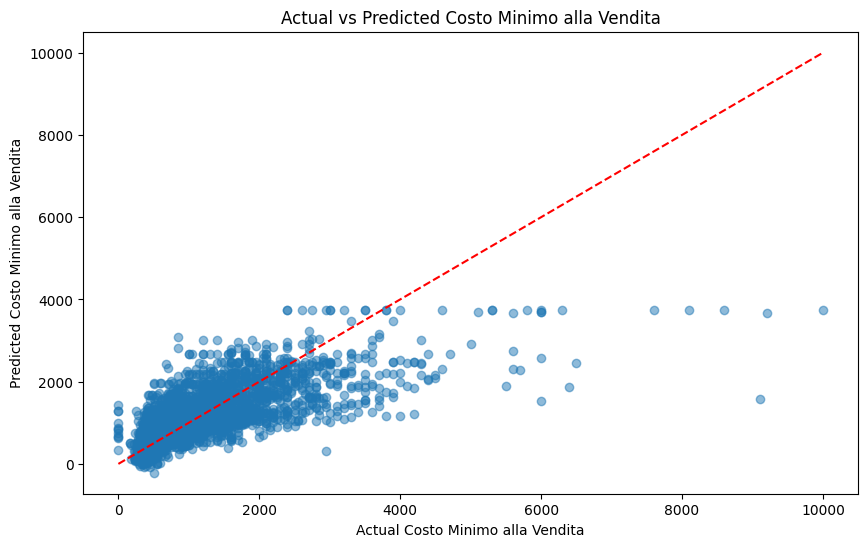

In [20]:
# Scatter plot to compare the predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(test['Costo Minimo alla Vendita'], model_3.predict(test), alpha=0.5)
plt.plot([test['Costo Minimo alla Vendita'].min(), test['Costo Minimo alla Vendita'].max()],
         [test['Costo Minimo alla Vendita'].min(), test['Costo Minimo alla Vendita'].max()], 'r--')
plt.xlabel('Actual Costo Minimo alla Vendita')
plt.ylabel('Predicted Costo Minimo alla Vendita')
plt.title('Actual vs Predicted Costo Minimo alla Vendita')
plt.show()


In [34]:
regr_cols = ["Indice di spopolamento","Indice di occupazione",
          "Indice disoccupazione","Tipo di località_Altri comuni non altrimenti classificati",
          "Tipo di località_Capoluogo senza specifici interessi turistici","Tipo di località_Città d\'Arte",
          "Tipo di località_Località collinari","Tipo di località_Località lacuali",
          "Tipo di località_Località marine","Tipo di località_Località montane",
          "Tipo di località_Località religiose","Tipo di località_Località termali", 
          "PC_Economica","PC_Turistica_1","PC_Turistica_2", "PC_Turistica_3", "PC_Turistica_4", 
          "PC_Turistica_5", "PC_Turistica_6", "PC_Turistica_7", "PC_Turistica_8", "PC_Turistica_9", 
          "PC_Turistica_10", "PC_Turistica_11", "PC_Turistica_12", "Macroarea_Isole", "Macroarea_Nord", 
          "Macroarea_Sud","Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico", 
          "Descrizione_Tipologia_di_Immobile_Abitazioni_signorili", 
          "Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi",
          "Descrizione_Tipologia_di_Immobile_Ville_e_Villini"]


In [35]:
print(train[regr_cols].shape)

(17210, 32)


In [36]:
# --- a) size() conta quante volte ricorre ogni riga “unica” -----------
dup_groups = (
    train
    .groupby(list(train[regr_cols].columns), dropna=False)   # dropna=False ⇒ NaN considerate valori
    .size()                                       # numero di occorrenze di ogni riga distinta
)

# --- b) filtra i gruppi con ≥2 occorrenze --------------------------------
dup_groups = dup_groups[dup_groups > 1]

# --- c) quante “famiglie” di duplicati? ----------------------------------
n_dup_groups = dup_groups.shape[0]
print(f"Numero di gruppi duplicati (full-row): {n_dup_groups}")

Numero di gruppi duplicati (full-row): 3727


In [37]:
(dup_groups
 .sort_values(ascending=False)
 .head(10)                         # primi 10 gruppi per numerosità
 .reset_index(name='n_occorrenze') # trasforma in DataFrame leggibile
)

,Indice di spopolamento,Indice di occupazione,Indice disoccupazione,Tipo di località_Altri comuni non altrimenti classificati,Tipo di località_Capoluogo senza specifici interessi turistici,Tipo di località_Città d'Arte,Tipo di località_Località collinari,Tipo di località_Località lacuali,Tipo di località_Località marine,Tipo di località_Località montane,...,PC_Turistica_11,PC_Turistica_12,Macroarea_Isole,Macroarea_Nord,Macroarea_Sud,Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico,Descrizione_Tipologia_di_Immobile_Abitazioni_signorili,Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi,Descrizione_Tipologia_di_Immobile_Ville_e_Villini,n_occorrenze
0,-1.7,47.4,12.94,False,False,True,False,False,False,False,...,-0.339299,0.140965,False,False,False,False,False,False,False,126
1,9.9,52.3,9.93,False,False,True,False,False,False,False,...,-0.253849,3.272085,False,True,False,False,False,False,False,56
2,6.3,51.8,8.62,False,True,False,False,False,False,False,...,0.601671,2.276896,False,False,False,False,False,False,False,47
3,2.1,47.4,8.38,False,False,True,False,False,False,False,...,2.360933,-2.343947,False,True,False,False,False,False,False,41
4,2.2,46.4,9.67,False,False,True,False,False,False,False,...,-0.245988,-0.614757,False,False,False,True,False,False,False,34
5,1.1,48.7,8.42,False,False,False,False,True,False,False,...,-0.883125,0.568643,False,True,False,False,False,False,False,31
6,7.8,49.0,10.09,False,False,True,False,False,False,False,...,1.144972,-1.547073,False,False,False,False,False,False,False,30
7,-3.4,50.1,8.77,False,False,True,False,False,False,False,...,1.517675,-0.894470,False,False,False,False,False,False,False,30
8,5.9,49.6,8.77,False,False,True,False,False,False,False,...,-1.445554,-0.711972,False,True,False,False,False,False,False,30
9,-1.7,47.4,12.94,False,False,True,False,False,False,False,...,-0.339299,0.140965,False,False,False,True,False,False,False,29


In [38]:
df_grouped = (
    train
    .groupby(list(train[regr_cols].columns), dropna=False)
    ['Media Costo alla Vendita']
    .mean()
    .reset_index()
)


In [41]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8182 entries, 0 to 8181
Data columns (total 33 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Indice di spopolamento                                           8181 non-null   float64
 1   Indice di occupazione                                            8181 non-null   float64
 2   Indice disoccupazione                                            8179 non-null   float64
 3   Tipo di località_Altri comuni non altrimenti classificati        8182 non-null   bool   
 4   Tipo di località_Capoluogo senza specifici interessi turistici   8182 non-null   bool   
 5   Tipo di località_Città d'Arte                                    8182 non-null   bool   
 6   Tipo di località_Località collinari                              8182 non-null   bool   
 7   Tipo di località_Località lacuali         

In [49]:
df_grouped.to_csv('data/df_grouped.csv', index=False)

In [39]:
print("Forma originale:", train.shape)
print("Dopo raggruppamento:", df_grouped.shape)


Forma originale: (17210, 52)
Dopo raggruppamento: (8182, 33)


In [40]:
duplicati_completi = df_grouped.duplicated()
print("Duplicati completi trovati:", duplicati_completi.sum())


Duplicati completi trovati: 0


In [43]:
df_grouped[regr_cols].agg(['mean', 'std'])


,Indice di spopolamento,Indice di occupazione,Indice disoccupazione,Tipo di località_Altri comuni non altrimenti classificati,Tipo di località_Capoluogo senza specifici interessi turistici,Tipo di località_Città d'Arte,Tipo di località_Località collinari,Tipo di località_Località lacuali,Tipo di località_Località marine,Tipo di località_Località montane,...,PC_Turistica_10,PC_Turistica_11,PC_Turistica_12,Macroarea_Isole,Macroarea_Nord,Macroarea_Sud,Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico,Descrizione_Tipologia_di_Immobile_Abitazioni_signorili,Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi,Descrizione_Tipologia_di_Immobile_Ville_e_Villini
mean,-1.598472,44.915194,12.516589,0.620875,0.010511,0.046321,0.078465,0.016989,0.055977,0.123686,...,0.017585,0.017494,-0.015020,0.110486,0.381569,0.207407,0.228306,0.000122,0.000122,0.050477
std,12.984828,7.501223,6.442091,0.485199,0.101989,0.210193,0.268918,0.129236,0.229890,0.329243,...,0.756457,0.789802,0.709153,0.313514,0.485801,0.405474,0.419767,0.011055,0.011055,0.218940


In [50]:
# Split the data into training and test sets
train, test = train_test_split(df_grouped, test_size=0.2, random_state=1)


In [51]:
# Regressione lineare con il nuovo df_grouped e y = "Media Costo alla Vendita"
model_grouped = smf.ols(
    'Q("Media Costo alla Vendita") ~ ' + ' + '.join([f'Q("{col}")' for col in regr_cols]),
    data=df_grouped
).fit()
model_grouped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("Media Costo alla Vendita")   R-squared:                       0.516
Model:                                       OLS   Adj. R-squared:                  0.514
Method:                            Least Squares   F-statistic:                     271.7
Date:                           Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                                   12:44:43   Log-Likelihood:                -62443.
No. Observations:                           8179   AIC:                         1.250e+05
Df Residuals:                               8146   BIC:                         1.252e+05
Df Model:                                     32                                         
Covariance Type:                       nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      -18.3652     85.268     -0.215      0.829    -185.512     148.781
Q("Tipo di località_Altri comuni non altrimenti classificati")[T.True]         -29.3391     30.342     -0.967      0.334     -88.818      30.140
Q("Tipo di località_Capoluogo senza specifici interessi turistici")[T.True]   -243.1100     62.989     -3.860      0.000    -366.584    -119.636
Q("Tipo di località_Città d'Arte")[T.True]                                    -225.2049     40.520     -5.558      0.000    -304.634    -145.775
Q("Tipo di località_Località collinari")[T.True]                              -128.9171     35.637     -3.617      0.000    -198.775     -59.059
Q("Tipo di località_Località lacuali")[T.True]                                 170.2348     52.360      3.251      0.001      67.597     272.873
Q("Tipo di località_Località marine")[T.True]                                  538.3083     39.589     13.598      0.000     460.704     615.912
Q("Tipo di località_Località montane")[T.True]                                 -49.8614     33.423     -1.492      0.136    -115.378      15.656
Q("Tipo di località_Località religiose")[T.True]                              -533.5749    253.219     -2.107      0.035   -1029.948     -37.202
Q("Tipo di località_Località termali")[T.True]                                -289.9535     62.318     -4.653      0.000    -412.112    -167.795
Q("Macroarea_Isole")[T.True]                                                   -74.4951     28.145     -2.647      0.008    -129.666     -19.324
Q("Macroarea_Nord")[T.True]                                                   -113.1895     15.334     -7.382      0.000    -143.248     -83.131
Q("Macroarea_Sud")[T.True]                                                     -98.2432     21.479     -4.574      0.000    -140.347     -56.140
Q("Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico")[T.True]   -275.7346     14.426    -19.113      0.000    -304.014    -247.455
Q("Descrizione_Tipologia_di_Immobile_Abitazioni_signorili")[T.True]            300.2184    516.660      0.581      0.561    -712.567    1313.004
Q("Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi")[T.True]  -669.3172    503.172     -1.330      0.183   -1655.663     317.028
Q("Descrizione_Tipologia_di_Immobile_Ville_e_Villini")[T.True]                 396.9377     26.408     15.031      0.000     345.172     448.703
Q("Indice di spopolamento")                                   

In [52]:
cols_to_drop = [
    "Tipo di località_Altri comuni non altrimenti classificati",
    "Tipo di località_Località montane",
    "Descrizione_Tipologia_di_Immobile_Abitazioni_signorili",
    "Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi",
    "Indice di spopolamento",
    "Indice disoccupazione",
    "PC_Turistica_3",
    "PC_Turistica_4",
    "PC_Turistica_5",
    "PC_Turistica_10"
]
# rename the df_grouped as df_grouped_dropped with the dropped columns
df_grouped_dropped = df_grouped.drop(columns=cols_to_drop)

In [53]:
# Split the data into training and test sets
train, test = train_test_split(df_grouped_dropped, test_size=0.2, random_state=1)


In [54]:
# linear regression with the new df_grouped_dropped
model_grouped_dropped = smf.ols(
    'Q("Media Costo alla Vendita") ~ ' + ' + '.join([f'Q("{col}")' for col in df_grouped_dropped.columns if col != "Media Costo alla Vendita"]),
    data=df_grouped_dropped
).fit()
model_grouped_dropped.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Q("Media Costo alla Vendita")   R-squared:                       0.515
Model:                                       OLS   Adj. R-squared:                  0.514
Method:                            Least Squares   F-statistic:                     393.7
Date:                           Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                                   12:45:19   Log-Likelihood:                -62469.
No. Observations:                           8181   AIC:                         1.250e+05
Df Residuals:                               8158   BIC:                         1.251e+05
Df Model:                                     22                                         
Covariance Type:                       nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      -4.4380     56.641     -0.078      0.938    -115.469     106.593
Q("Tipo di località_Capoluogo senza specifici interessi turistici")[T.True]  -198.9294     56.016     -3.551      0.000    -308.736     -89.123
Q("Tipo di località_Città d'Arte")[T.True]                                   -197.6990     29.093     -6.796      0.000    -254.728    -140.670
Q("Tipo di località_Località collinari")[T.True]                              -97.3966     21.614     -4.506      0.000    -139.765     -55.028
Q("Tipo di località_Località lacuali")[T.True]                                214.3560     44.092      4.862      0.000     127.925     300.787
Q("Tipo di località_Località marine")[T.True]                                 580.1018     27.580     21.034      0.000     526.039     634.165
Q("Tipo di località_Località religiose")[T.True]                             -461.3521    251.663     -1.833      0.067    -954.676      31.972
Q("Tipo di località_Località termali")[T.True]                               -241.1571     55.593     -4.338      0.000    -350.133    -132.182
Q("Macroarea_Isole")[T.True]                                                  -57.9084     23.999     -2.413      0.016    -104.953     -10.864
Q("Macroarea_Nord")[T.True]                                                  -119.7689     15.180     -7.890      0.000    -149.525     -90.013
Q("Macroarea_Sud")[T.True]                                                    -91.5797     19.879     -4.607      0.000    -130.548     -52.611
Q("Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico")[T.True]  -278.3898     14.389    -19.348      0.000    -306.595    -250.185
Q("Descrizione_Tipologia_di_Immobile_Ville_e_Villini")[T.True]                402.9212     26.355     15.288      0.000     351.258     454.585
Q("Indice di occupazione")                                                     29.1993      1.142     25.561      0.000      26.960      31.439
Q("PC_Economica")                                                              60.1154     10.480      5.736      0.000      39.572      80.659
Q("PC_Turistica_1")                                                            97.4049      6.280     15.511      0.000      85.095     109.715
Q("PC_Turistica_2")                                                           -92.1855      9.000    -10.243      0.000    -109.827     -74.544
Q("PC_Turistica_6")                                                            90.

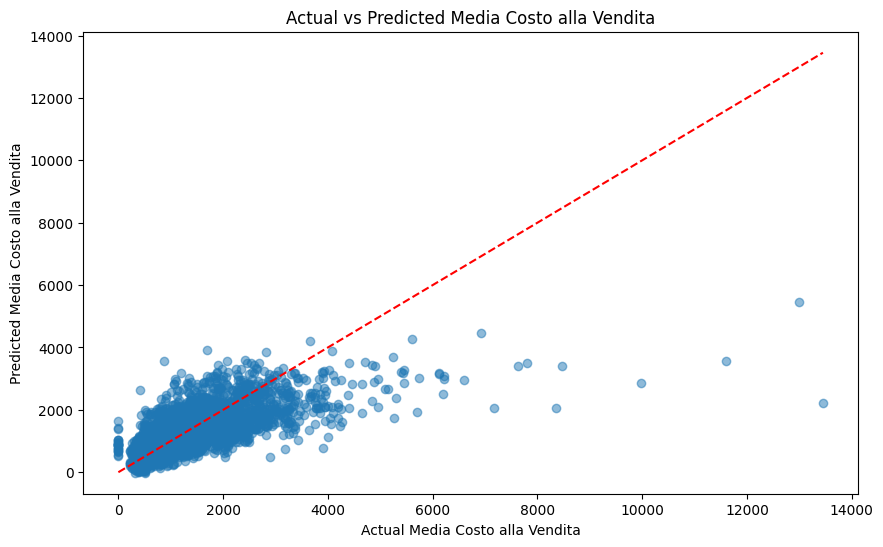

In [47]:
# scatter plot to compare the predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(df_grouped_dropped['Media Costo alla Vendita'], model_grouped_dropped.predict(df_grouped_dropped), alpha=0.5)
plt.plot([df_grouped_dropped['Media Costo alla Vendita'].min(), df_grouped_dropped['Media Costo alla Vendita'].max()],
         [df_grouped_dropped['Media Costo alla Vendita'].min(), df_grouped_dropped['Media Costo alla Vendita'].max()], 'r--')
plt.xlabel('Actual Media Costo alla Vendita')
plt.ylabel('Predicted Media Costo alla Vendita')
plt.title('Actual vs Predicted Media Costo alla Vendita')
plt.show()


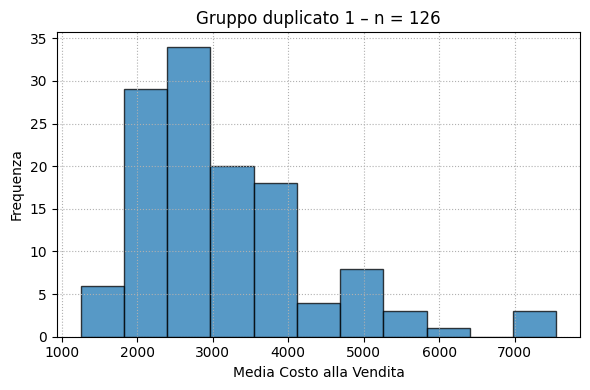

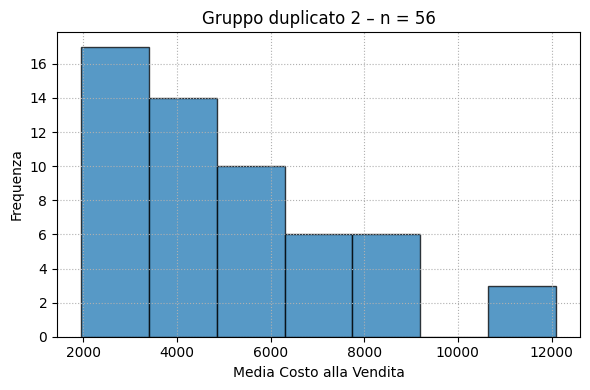

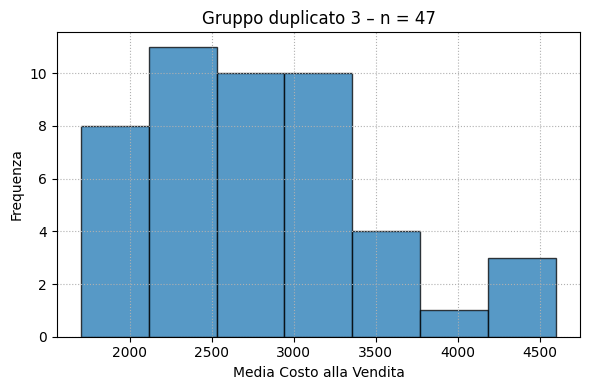

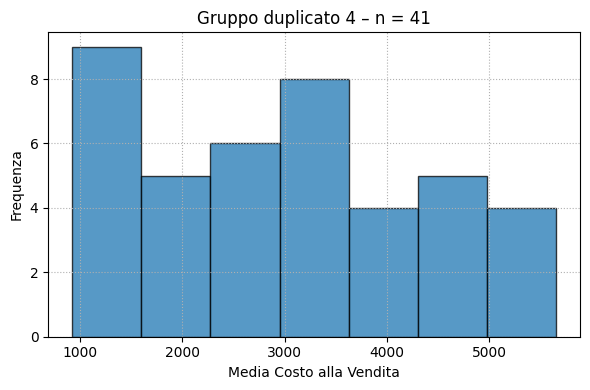

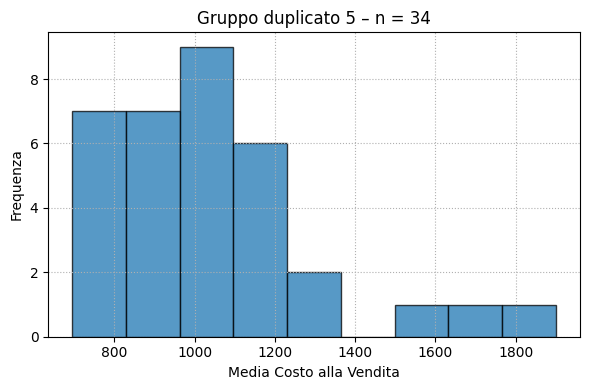

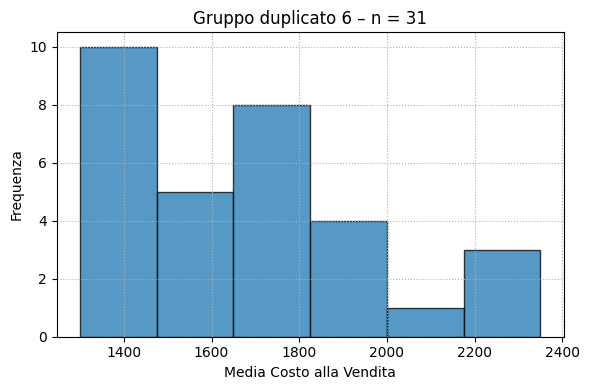

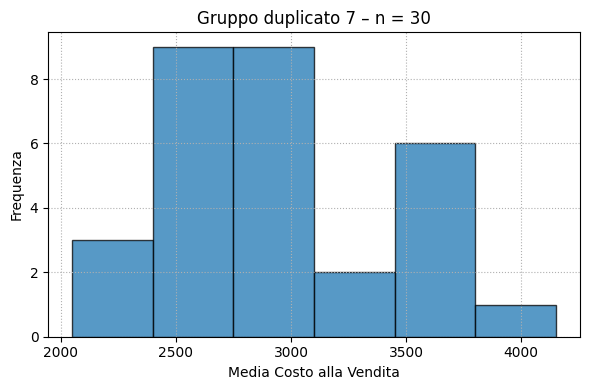

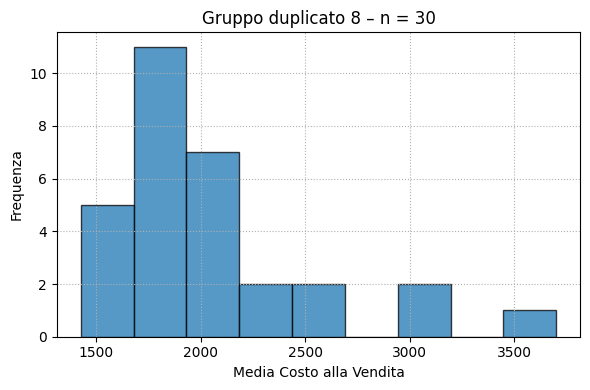

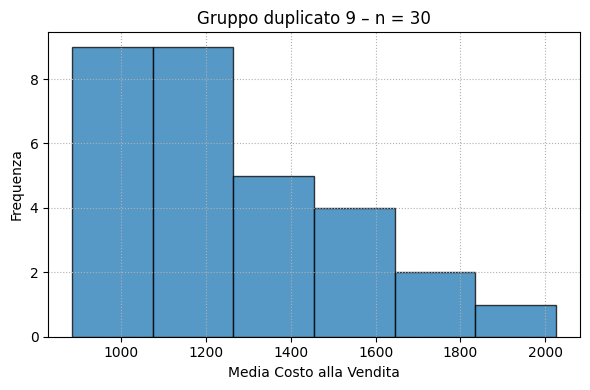

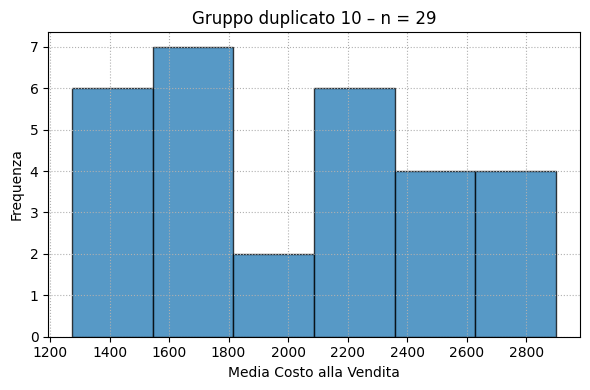

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# -------------------- individuazione dei gruppi --------------------
grp_indices = (
    train
    .groupby(list(train[regr_cols].columns), dropna=False)
    .indices
)

sorted_groups = sorted(grp_indices.items(),
                       key=lambda kv: len(kv[1]),
                       reverse=True)

top10_groups = sorted_groups[:10]

# -------------------- plot istogrammi ------------------------------
plt.rcParams.update({
    "figure.figsize": (6, 4),
    "axes.grid": True,
    "grid.linestyle": ":"
})

target = 'Media Costo alla Vendita'

for i, (key, idxs) in enumerate(top10_groups, start=1):
    plt.figure()
    
    # NB: idxs è un Int64Index di POSIZIONI → usiamo .iloc
    train[target].iloc[idxs].hist(
        bins='auto', edgecolor='black', alpha=0.75
    )
    
    plt.title(f'Gruppo duplicato {i} – n = {len(idxs)}')
    plt.xlabel(target)
    plt.ylabel('Frequenza')
    plt.tight_layout()
    plt.show()


In [ ]:
# Rimuovi i duplicati da train[regr_cols]
train_small = train[~train.duplicated(subset=regr_cols)]


In [76]:
top10_groups

[((np.float64(-1.7),
   np.float64(47.4),
   np.float64(12.94),
   np.False_,
   np.False_,
   np.True_,
   np.False_,
   np.False_,
   np.False_,
   np.False_,
   np.False_,
   np.False_,
   np.float64(33.73338043445401),
   np.float64(12.037272125584357),
   np.float64(20.510304801948354),
   np.float64(9.577357868130902),
   np.float64(-4.741734124437839),
   np.float64(-0.2810183674708562),
   np.float64(0.3424195929323329),
   np.float64(-0.1568510787670797),
   np.float64(-0.2780336402513831),
   np.float64(-0.570815666831328),
   np.float64(0.1751184244773496),
   np.float64(-0.3392989334483742),
   np.float64(0.1409650412191892),
   np.False_,
   np.False_,
   np.False_,
   np.False_,
   np.False_,
   np.False_,
   np.False_),
  array([   31,    53,   112,   472,   724,   888,   959,  1122,  1226,
          1722,  1772,  2082,  2156,  2169,  2213,  2391,  2556,  2650,
          3446,  3462,  3734,  3772,  3823,  3824,  3942,  4029,  4178,
          4252,  4276,  4606,  4709,  4

In [81]:

pd.set_option('display.max_columns', None)
train.iloc[top10_groups[0][1]].head(10)

,id_istat,id_comune,Provincia,Regione,Ripartizione Geografica,id_catastale,Indice di spopolamento,Codice regione,Capoluogo_enc,Codice comuni,Indice di occupazione,Indice disoccupazione,Fascia,Descrizione Zona,Sottofascia Zona,id_univoco,Costo Minimo alla Vendita,Costo Massimo alla Vendita,Media Costo alla Vendita,Costo Minimo alla Locazione,Costo Massimo alla Locazione,Media Costo alla Locazione,Cod. Circoscrizione Turistica,Tipo di località_Altri comuni non altrimenti classificati,Tipo di località_Capoluogo senza specifici interessi turistici,Tipo di località_Città d'Arte,Tipo di località_Località collinari,Tipo di località_Località lacuali,Tipo di località_Località marine,Tipo di località_Località montane,Tipo di località_Località religiose,Tipo di località_Località termali,PC_Economica,PC_Turistica_1,PC_Turistica_2,PC_Turistica_3,PC_Turistica_4,PC_Turistica_5,PC_Turistica_6,PC_Turistica_7,PC_Turistica_8,PC_Turistica_9,PC_Turistica_10,PC_Turistica_11,PC_Turistica_12,Macroarea_Isole,Macroarea_Nord,Macroarea_Sud,Descrizione_Tipologia_di_Immobile_Abitazioni_di_tipo_economico,Descrizione_Tipologia_di_Immobile_Abitazioni_signorili,Descrizione_Tipologia_di_Immobile_Abitazioni_tipiche_dei_luoghi,Descrizione_Tipologia_di_Immobile_Ville_e_Villini
13352,58091,Roma,Roma,Lazio,Centro,H501,-1.7,12,1,91.0,47.4,12.94,E,SERPENTARA (VIALE LINA CAVALIERI),E42,H501_E42_Abitazioni civili,1900.0,2750.0,2325.0,7.0,10.0,8.50,582006.0,False,False,True,False,False,False,False,False,False,33.73338,12.037272,20.510305,9.577358,-4.741734,-0.281018,0.34242,-0.156851,-0.278034,-0.570816,0.175118,-0.339299,0.140965,False,False,False,False,False,False,False
13355,58091,Roma,Roma,Lazio,Centro,H501,-1.7,12,1,91.0,47.4,12.94,E,SETTEBAGNI (VIA S.ANTONIO DA PADOVA),E50,H501_E50_Abitazioni civili,1550.0,2250.0,1900.0,7.8,11.5,9.65,582006.0,False,False,True,False,False,False,False,False,False,33.73338,12.037272,20.510305,9.577358,-4.741734,-0.281018,0.34242,-0.156851,-0.278034,-0.570816,0.175118,-0.339299,0.140965,False,False,False,False,False,False,False
13342,58091,Roma,Roma,Lazio,Centro,H501,-1.7,12,1,91.0,47.4,12.94,E,TORRE MAURA (VIA WALTER TOBAGI),E3,H501_E3_Abitazioni civili,1600.0,2400.0,2000.0,7.5,11.0,9.25,582006.0,False,False,True,False,False,False,False,False,False,33.73338,12.037272,20.510305,9.577358,-4.741734,-0.281018,0.34242,-0.156851,-0.278034,-0.570816,0.175118,-0.339299,0.140965,False,False,False,False,False,False,False
13202,58091,Roma,Roma,Lazio,Centro,H501,-1.7,12,1,91.0,47.4,12.94,C,BOLOGNA (VIA LIVORNO),C24,H501_C24_Abitazioni civili,3300.0,4500.0,3900.0,11.8,16.0,13.90,582006.0,False,False,True,False,False,False,False,False,False,33.73338,12.037272,20.510305,9.577358,-4.741734,-0.281018,0.34242,-0.156851,-0.278034,-0.570816,0.175118,-0.339299,0.140965,False,False,False,False,False,False,False
13315,58091,Roma,Roma,Lazio,Centro,H501,-1.7,12,1,91.0,47.4,12.94,E,"PISANA-PONTE GALERIA (VIA ETTORE SCANDALE,VIA ...",E156,H501_E156_Abitazioni civili,1750.0,2450.0,2100.0,6.0,9.0,7.50,582006.0,False,False,True,False,False,False,False,False,False,33.73338,12.037272,20.510305,9.577358,-4.741734,-0.281018,0.34242,-0.156851,-0.278034,-0.570816,0.175118,-0.339299,0.140965,False,False,False,False,False,False,False
13175,58091,Roma,Roma,Lazio,Centro,H501,-1.7,12,1,91.0,47.4,12.94,B,AVENTINO (RIPA-VIA DI S.SABINA),B12,H501_B12_Abitazioni civili,5000.0,7100.0,6050.0,17.0,24.5,20.75,582006.0,False,False,True,False,False,False,False,False,False,33.73338,12.037272,20.510305,9.577358,-4.741734,-0.281018,0.34242,-0.156851,-0.278034,-0.570816,0.175118,-0.339299,0.140965,False,False,False,False,False,False,False
13221,58091,Roma,Roma,Lazio,Centro,H501,-1.7,12,1,91.0,47.4,12.94,C,TOR MARANCIA NAVIGATORI (VIA C.T.ODESCALCHI),C48,H501_C48_Abitazioni civili,2450.0,3600.0,3025.0,8.5,12.5,10.50,582006.0,False,False,True,False,False,False,False,False,False,33.73338,12.037272,20.510305,9.577358,-4.741734,-0.281018,0.34242,-0.156851,-0.278034,-0.570816,0.175118,-0.339299